## Implementation of normalized variance

https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/epdf/10.1002/jemt.20118

https://cellprofiler-manual.s3.amazonaws.com/CellProfiler-4.0.5/modules/measurement.html#:~:text=Measurements%20made%20by%20this%20module,-Blur%20metrics&text=FocusScore%3A%20A%20measure%20of%20the,scores%20correspond%20to%20lower%20bluriness. 

In [ ]:
# // this is valid JavaScript
# // two slashes indicate a comment (it is skipped by the JS engine)
# // the script is made of statements delimited by a semi-colon ;
# // variables must be declared before use with var statement
# var a = 1;                       // Number
# var b = 0.5;                     // Number
# var str1 = "Hello";              // String using double quotes
# var array = [ 1, 2, 3 ];         // Array with three items
# var count = array.length;        // Array has .length attribute
# var emptyarray = [];             // Empty array
# var c = array[1];                // accessing array item with zero-based index

# // blocks are used to group more statements together with { }
# // if is a conditional statement that executes a block if the condition is true
# // if can be followed by more than one else if () and an else
# // variable declared inside a block is visible in the block only

# if (a == 10) {       // == is comparison equal while = is for assignemt
#    var d = c - a;    // variable visible only in this block
#    b = b * d;        // can be shortened by b *= d (multiplication and assignment)
# }
# else if (100 < a) {
#    b = 1e6;          // numbers in scientific notation
# }
# else                 // braces can be omited if there is just one statement
#    b = 0;

# // for loop is useful to iterate over Arrays
# // typically an index (i) is declared and iterated from 0 until length

# var sum = 0;
# for (var i = 0; i < array.length; i++) // i++ is shortened i += 1 and i = i + 1
#    sum += array[i];

# // functions are pieces of code block that can be called at any other place
# // functions may have parameters and may return a value

# function abs(value) { // abs function definition: computes absolute value

#    // conditional (ternary) operator (condition) ? tru_value : false_value
#    return value < 0 ? -value : value;
# }

# // function call
# var one = abs(-1);

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# B06 = [2.30935390487723E-05,
# 6.21572013278811E-05,
# 0.000119173138878,
# 0.00021597864484,
# 0.000132916806457,
# 0.000124029927739,
# 0.000317947916273,
# 0.000364601524224,
# 0.00040335057836,
# 0.000327100868552,
# 0.000397284723792,
# 0.000363881548587,
# 0.00024956171438,
# 7.49251953216709E-05,
# 3.61659715424399E-05,
# 2.19459964612334E-05,
# ]

# J21 = [9.42602074681451E-05,
# 0.000103444990235,
# 0.000211695322001,
# 0.000178228145004,
# 0.000168585419328,
# 0.000161563997858,
# 0.000163812081065,
# 0.000126091572223,
# 0.000137869802033,
# 0.000147287389891,
# 9.77430683984055E-05,
# 6.55289431816835E-05,
# 6.92705983360348E-05,
# 8.08220831082534E-05,
# 5.51835570339594E-05,
# 2.43120535569605E-05,
# ]


In [2]:
# Import csv from file to pandas dataframe
df = pd.read_csv('Image.csv')

wells = df.Metadata_Well.unique()

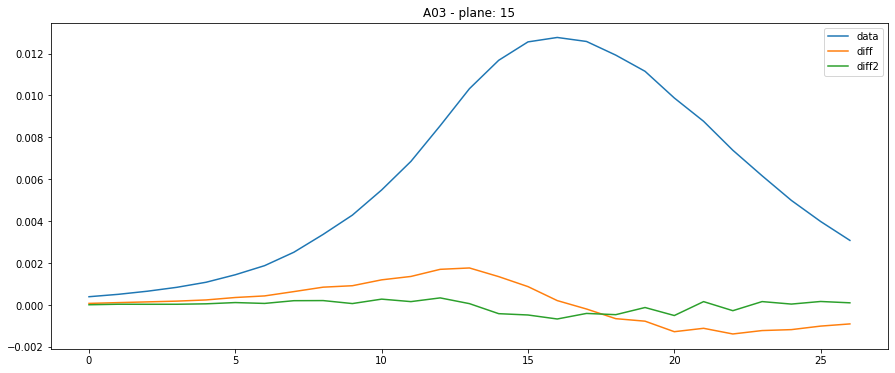

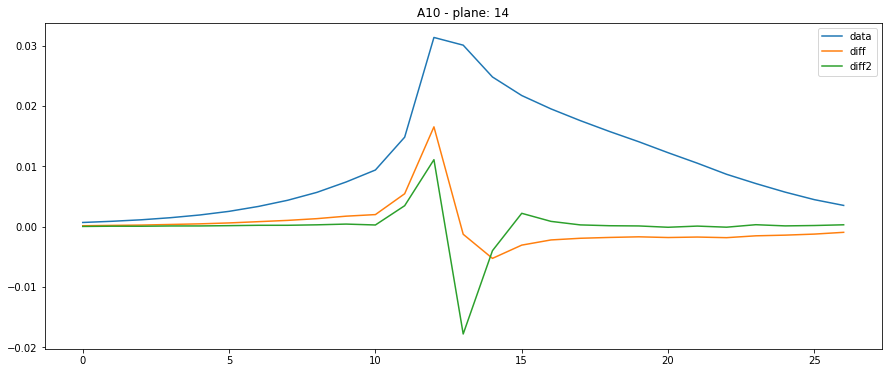

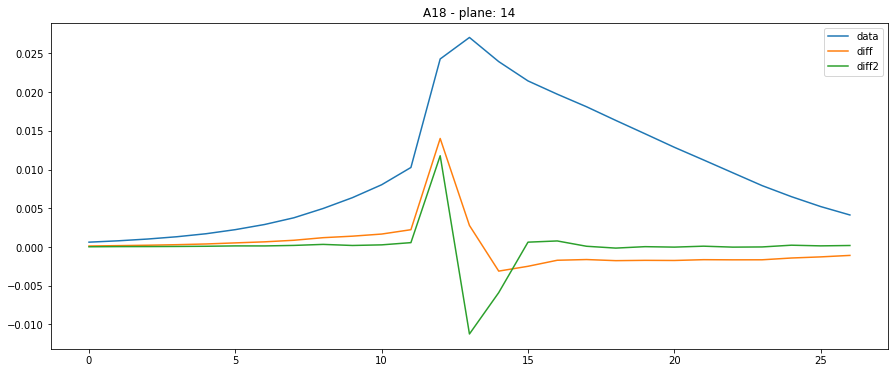

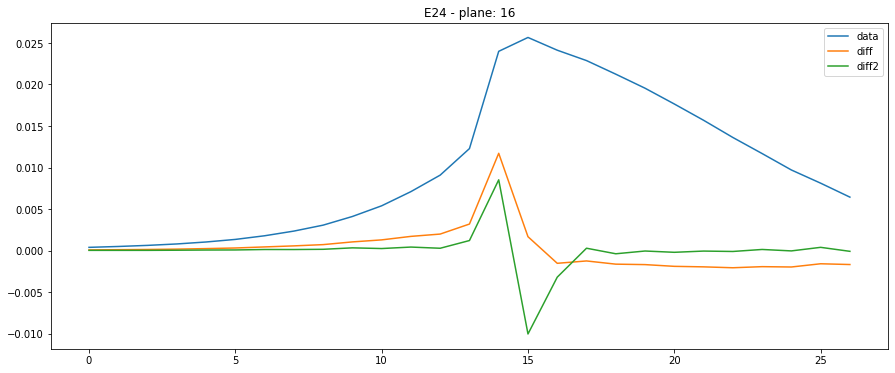

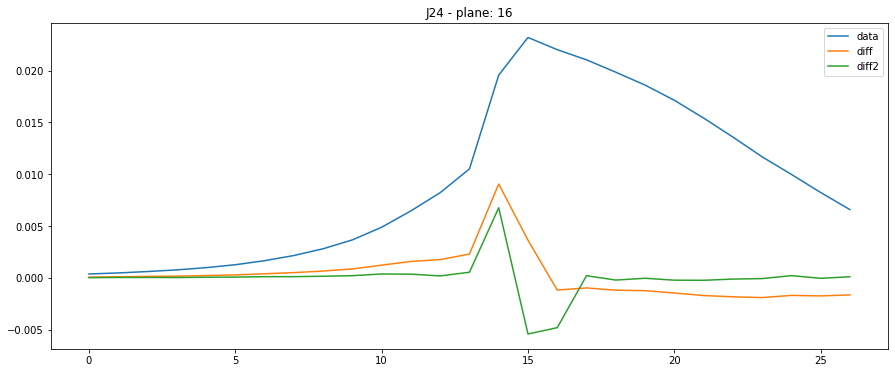

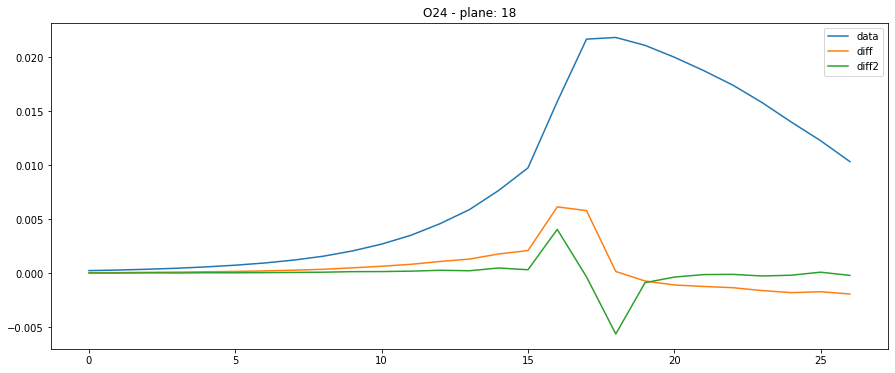

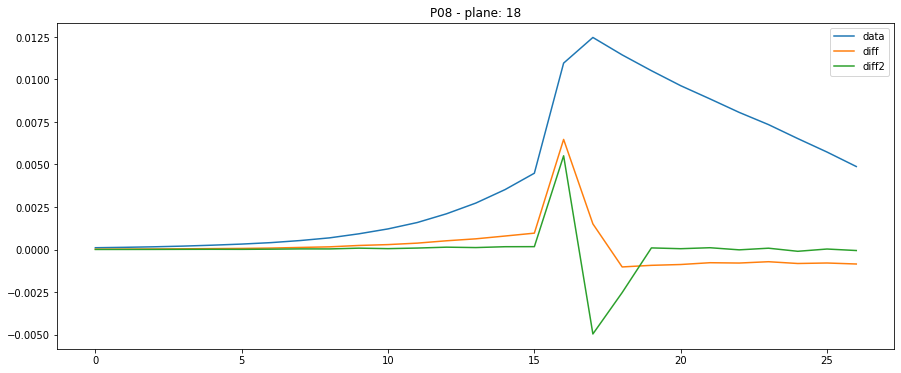

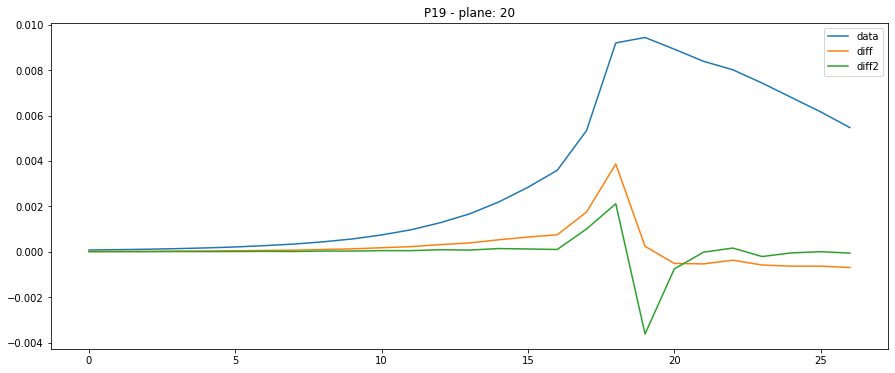

In [9]:


for well in wells:

    # Filter dataframe 
    df_subset = df[df["Metadata_Well"] == well]

    # convert to numpy array
    data = df_subset["ImageQuality_FocusScore_SYTO"].to_numpy()

    data = data[0:29]



    #  Plot the data
    fig = plt.figure(figsize=(15, 6))
    plt.plot(data[2:29])

    # Take the derivative of the data
    data_diff = np.diff(data)

    plt.plot(data_diff[1:29])


    # Find the max value and position of the derivative
    max_index = np.argmax(data_diff)
    max_index= max_index + 1


    # Take the derivative of the data
    data_diff2 = np.diff(data_diff)

    plt.plot(data_diff2)


    # add legend
    plt.legend(['data', 'diff', 'diff2'])

    plt.title(str(well) + " - plane: " + str(max_index))

    plt.show()


## Try the same directly with the tiff images

In [7]:
# Get the package for images
from tifffile import imread


In [8]:
def normalized_variance(image):
    mean_val = np.mean(image)
    var_val = np.var(image)
    return var_val / mean_val

In [9]:
# This will read the Z-stack into a 3D NumPy array
zstack = imread("PointA18_0002_ChannelSYTO_Spheroid_Bounds_Seq0012.ome.tif")

print(zstack.shape)  # Should print (num_slices, height, width)


(29, 1024, 1024)


In [27]:
# Compute the normalized variance for each slice

nv = np.zeros(zstack.shape[0])
var = np.zeros(zstack.shape[0])
mean = np.zeros(zstack.shape[0])
for i in range(zstack.shape[0]):
    nv[i] = normalized_variance(zstack[i, :, :])
    var[i] = np.var(zstack[i, :, :])
    mean[i] = np.mean(zstack[i, :, :])


In [13]:
well = 'A18'

Text(0.5, 1.0, 'A18 - plane: 14')

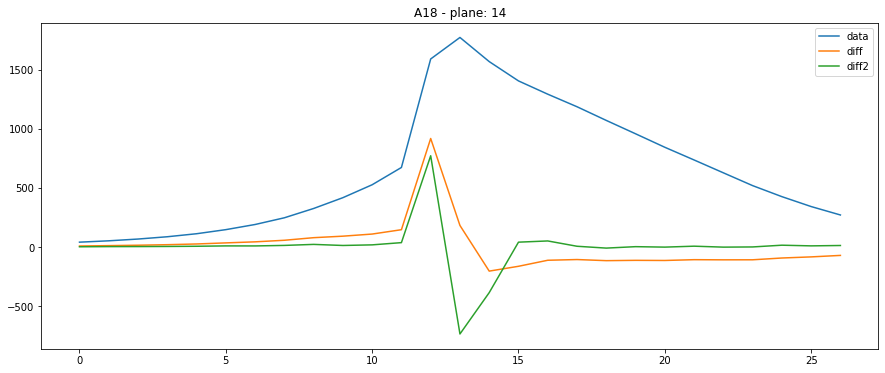

In [14]:
#  Plot the data
fig = plt.figure(figsize=(15, 6))
plt.plot(nv[2:29])

# Take the derivative of the data
data_diff = np.diff(nv)

plt.plot(data_diff[1:29])


# Find the max value and position of the derivative
max_index = np.argmax(data_diff)
max_index= max_index + 1


# Take the derivative of the data
data_diff2 = np.diff(data_diff)

plt.plot(data_diff2)


# add legend
plt.legend(['data', 'diff', 'diff2'])

plt.title(str(well) + " - plane: " + str(max_index))



In [24]:
# Concatenate two arrays on the second axis

data_diff2 = np.concatenate(([0], data_diff))

A = np.concatenate(([nv], [data_diff2]))

A = np.transpose(A)